In [1]:
# Preparing the IMDB data

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [3]:
max_features = 10000
max_len = 500

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [7]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [8]:
# Training and evaluating a simple 1D convnet on the IMDB data

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 78ms/step - loss: 0.7165 - accuracy: 0.5482 - val_loss: 0.6765 - val_accuracy: 0.5786
Epoch 2/10
157/157 [==============================] - 11s 72ms/step - loss: 0.6509 - accuracy: 0.7074 - val_loss: 0.6402 - val_accuracy: 0.6798
Epoch 3/10
157/157 [==============================] - 11s 70ms/step - loss: 0.5838 - accuracy: 0.7800 - val_loss: 0.5528 - val_accuracy: 0.7498
Epoch 4/10
157/157 [==============================] - 11s 71ms/step - loss: 0.4663 - accuracy: 0.8259 - val_loss: 0.4357 - val_accuracy: 0.8244
Epoch 5/10
157/157 [==============================] - 11s 70ms/step - loss: 0.3737 - accuracy: 0.8597 - val_loss: 0.4103 - val_accuracy: 0.8444
Epoch 6/10
157/157 [==============================] - 11s 70ms/step - loss: 0.3247 - accuracy: 0.8827 - val_loss: 0.4212 - val_accuracy: 0.8538
Epoch 7/10
157/157 [==============================] - 11s 71ms/step - loss: 0.2900 - accuracy: 0.8980 - val_loss: 0.4740 - val_accuracy:

In [14]:
# Plotting results

In [15]:
import matplotlib.pyplot as plt

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
epochs = range(1, len(acc) + 1)

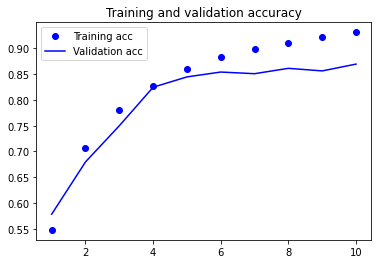

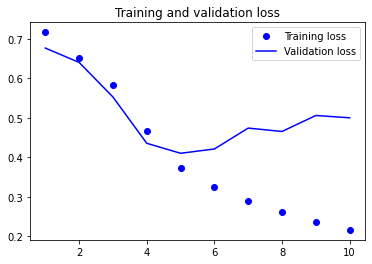

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()